<a href="https://colab.research.google.com/github/nnguyenu/ML-basic/blob/main/Logistic_Regression_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# %reset
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from keras.datasets import mnist

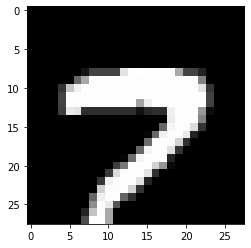

(60000, 784) (60000,)


In [6]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# display data as an image
plt.imshow(X_train[942])
plt.gray()
plt.show()

nsamples, nx, ny = X_train.shape
X_train = X_train.reshape(nsamples,nx*ny)

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape(nsamples,nx*ny)

print(X_train.shape,Y_train.shape)

In [7]:
cls = [[0], [1]]

def extract_data(X, y, classes):
    """
    X: numpy array, matrix of size (N, d), d is data dim
    y: numpy array, size (N, )
    cls: two lists of labels. For example: 
        cls = [[1, 4, 7], [5, 6, 8]]
    return:
        X: extracted data
        y: extracted label 
        (0 and 1, corresponding to two lists in cls)
    """
    y_res_id = np.array([])
    for i in cls[0]:
      for j in range(y.shape[0]):
        if y[j] == i:
          # Append values to the end of an array.
          y_res_id = np.append(y_res_id, j)
    n0 = len(y_res_id)

    for i in cls[1]:
      for j in range(y.shape[0]):
        if y[j] == i:
          y_res_id = np.append(y_res_id, j)
    n1 = len(y_res_id) - n0
    
    # return copy of the array, cast to a specified type ('int' in this case)
    y_res_id = y_res_id.astype(int)
    
    # take all X[i] that in y_res_id & divide all number by 255 to make it in range [0,1]
    X_res = X[y_res_id, :]/255.0
    # assign label to data in X_res
    y_res = np.asarray([0]*n0 + [1]*n1)
    return (X_res, y_res)

# extract data for training 
(newX_train, newy_train) = extract_data(X_train, Y_train, cls)

# extract data for test 
(newX_test, newy_test) = extract_data(X_test, Y_test, cls)

In [8]:
# train the logistic regression model 
logreg = linear_model.LogisticRegression(C=1e5) # just a big number 
logreg.fit(newX_train, newy_train)

# predict 
y_pred = logreg.predict(newX_test)
print("Accuracy:",(100*accuracy_score(newy_test, y_pred)),'%')

Accuracy: 99.95271867612293 %


wrong at image 942 : predict: 1 result: 0


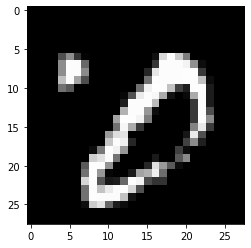

In [9]:
# display misclassified image(s)
misclass = []
for i in range(len(y_pred)):
  if y_pred[i] != newy_test[i]:
    print('wrong at image',i,':','predict:',y_pred[i],'result:',newy_test[i])
    misclass.append(i)
Xmis = newX_test[misclass, :]
Xmis = Xmis.reshape(len(misclass),nx,ny)
for i in range(Xmis.shape[0]):
  plt.imshow(Xmis[i])
plt.show()

In [ ]:
# predict every number with one-vs-rest
# runtime is about 20 minutes so pls don't run this
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
print("Accuracy: %.2f %%" %(100*accuracy_score(Y_test, y_pred.tolist())))